# Plotting Experimental Results

This notebooks analyzes and plots the collected results store in the `reports` folder. The results are stored in CSV files.

## Setup

In [1]:
import os
import sys

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
palette = ['#83B8FE', '#FFA54C', '#94ED67', '#FF7FFF']

In [22]:
active_col = 'Active (Dmax 0.6, pDC50 6.0)'
test_split = 0.1
n_models_for_test = 3
cv_n_folds = 5

active_name = active_col.replace(' ', '_').replace('(', '').replace(')', '').replace(',', '')
report_base_name = f'{active_name}_test_split_{test_split}'

# TODO: Maybe a function to get the experiment dataframes would help...
# def get_experiment_df(experiment_name, report, splits=['random', 'uniprot', 'tanimoto']):
#     for split in splits:
#         df = []
#         for report_name in ['cv', 'ablation', 'hparam', 'majority_vote']:
#             filename = f'reports/{report_name}_report_{report_base_name}_{split}.csv'
#             df.append(pd.read_csv(filename))
#         report[experiment_name] = pd.concat(df)
#     return report

reports = {}
for experiment in ['', 'xgboost_', 'cellsonehot_', 'aminoacidcnt_']:
    reports[f'{experiment}cv_train'] = pd.concat([
        pd.read_csv(f'reports/{experiment}cv_report_{report_base_name}_standard.csv'),
        pd.read_csv(f'reports/{experiment}cv_report_{report_base_name}_target.csv'),
        pd.read_csv(f'reports/{experiment}cv_report_{report_base_name}_similarity.csv'),
    ])
    reports[f'{experiment}test'] = pd.concat([
        pd.read_csv(f'reports/{experiment}test_report_{report_base_name}_standard.csv'),
        pd.read_csv(f'reports/{experiment}test_report_{report_base_name}_target.csv'),
        pd.read_csv(f'reports/{experiment}test_report_{report_base_name}_similarity.csv'),
    ])
    reports[f'{experiment}hparam'] = pd.concat([
        pd.read_csv(f'reports/{experiment}hparam_report_{report_base_name}_standard.csv'),
        pd.read_csv(f'reports/{experiment}hparam_report_{report_base_name}_target.csv'),
        pd.read_csv(f'reports/{experiment}hparam_report_{report_base_name}_similarity.csv'),
    ])
    reports[f'{experiment}majority_vote'] = pd.concat([
        pd.read_csv(f'reports/{experiment}majority_vote_report_{report_base_name}_standard.csv'),
        pd.read_csv(f'reports/{experiment}majority_vote_report_{report_base_name}_target.csv'),
        pd.read_csv(f'reports/{experiment}majority_vote_report_{report_base_name}_similarity.csv'),
    ])
    if experiment != 'xgboost_':
        reports[f'{experiment}ablation'] = pd.concat([
            pd.read_csv(f'reports/{experiment}ablation_report_{report_base_name}_standard.csv'),
            pd.read_csv(f'reports/{experiment}ablation_report_{report_base_name}_target.csv'),
            pd.read_csv(f'reports/{experiment}ablation_report_{report_base_name}_similarity.csv'),
        ])

for k, report in reports.items():
    print(f'{k}: {report.shape}')
    # display(report.head())

cv_train: (15, 52)
test: (9, 34)
hparam: (3, 7)
majority_vote: (6, 28)
ablation: (84, 22)
xgboost_cv_train: (15, 24)
xgboost_test: (9, 20)
xgboost_hparam: (3, 7)
xgboost_majority_vote: (3, 19)
cellsonehot_cv_train: (15, 52)
cellsonehot_test: (9, 34)
cellsonehot_hparam: (3, 7)
cellsonehot_majority_vote: (6, 28)
cellsonehot_ablation: (84, 22)
aminoacidcnt_cv_train: (15, 52)
aminoacidcnt_test: (9, 34)
aminoacidcnt_hparam: (3, 7)
aminoacidcnt_majority_vote: (6, 28)
aminoacidcnt_ablation: (84, 22)


<!-- # # Load the data
# reports = {
#     'cv_train': pd.concat([
#         pd.read_csv(f'reports/cv_report_{report_base_name}_random.csv'),
#         pd.read_csv(f'reports/cv_report_{report_base_name}_uniprot.csv'),
#         pd.read_csv(f'reports/cv_report_{report_base_name}_tanimoto.csv'),
#     ]),
#     'test': pd.concat([
#         pd.read_csv(f'reports/test_report_{report_base_name}_random.csv'),
#         pd.read_csv(f'reports/test_report_{report_base_name}_uniprot.csv'),
#         pd.read_csv(f'reports/test_report_{report_base_name}_tanimoto.csv'),
#     ]),
#     'ablation': pd.concat([
#         pd.read_csv(f'reports/ablation_zero_vectors_report_{report_base_name}_random.csv'),
#         pd.read_csv(f'reports/ablation_zero_vectors_report_{report_base_name}_uniprot.csv'),
#         pd.read_csv(f'reports/ablation_zero_vectors_report_{report_base_name}_tanimoto.csv'),
#     ]),
#     'hparam': pd.concat([
#         pd.read_csv(f'reports/hparam_report_{report_base_name}_random.csv'),
#         pd.read_csv(f'reports/hparam_report_{report_base_name}_uniprot.csv'),
#         pd.read_csv(f'reports/hparam_report_{report_base_name}_tanimoto.csv'),
#     ]),
#     'majority_vote': pd.concat([
#         pd.read_csv(f'reports/majority_vote_report_{report_base_name}_random.csv'),
#         pd.read_csv(f'reports/majority_vote_report_{report_base_name}_uniprot.csv'),
#         pd.read_csv(f'reports/majority_vote_report_{report_base_name}_tanimoto.csv'),
#     ]),
#     'xgboost_cv_train': pd.concat([
#         pd.read_csv(f'reports/xgboost_cv_report_{report_base_name}_random.csv'),
#         pd.read_csv(f'reports/xgboost_cv_report_{report_base_name}_uniprot.csv'),
#         pd.read_csv(f'reports/xgboost_cv_report_{report_base_name}_tanimoto.csv'),
#     ]),
#     'xgboost_test': pd.concat([
#         pd.read_csv(f'reports/xgboost_test_report_{report_base_name}_random.csv'),
#         pd.read_csv(f'reports/xgboost_test_report_{report_base_name}_uniprot.csv'),
#         pd.read_csv(f'reports/xgboost_test_report_{report_base_name}_tanimoto.csv'),
#     ]),
#     'xgboost_hparam': pd.concat([
#         pd.read_csv(f'reports/xgboost_hparam_report_{report_base_name}_random.csv'),
#         pd.read_csv(f'reports/xgboost_hparam_report_{report_base_name}_uniprot.csv'),
#         pd.read_csv(f'reports/xgboost_hparam_report_{report_base_name}_tanimoto.csv'),
#     ]),
#     'xgboost_majority_vote': pd.concat([
#         pd.read_csv(f'reports/xgboost_majority_vote_report_{report_base_name}_random.csv'),
#         pd.read_csv(f'reports/xgboost_majority_vote_report_{report_base_name}_uniprot.csv'),
#         pd.read_csv(f'reports/xgboost_majority_vote_report_{report_base_name}_tanimoto.csv'),
#     ]),
# } -->
(Legacy code here as comment)

## Print CV Folds Parameters

Print the dataset characteristics for each fold set per experiment.

In [4]:
cols_to_show = {
    'fold': 'Fold',
    'split_type': 'Study split',
    'train_len': 'Train size',
    'val_len': 'Val size',
    'test_len': 'Test size',
    'train_active_perc': 'Train active %',
    'val_active_perc': 'Val active %',
    'test_active_perc': 'Test active %',
    # 'train_unique_groups': '',
    # 'val_unique_groups': '',
    'perc_leaking_uniprot_train_test': 'Leaking Uniprot %',
    'perc_leaking_smiles_train_test': 'Leaking SMILES %',
    'test_avg_tanimoto_dist': 'Avg Tanimoto distance',
}
# print(reports['cv_train'][cols_to_show].to_markdown(index=False))
# Print a subset of columns (that contain the string "perc_") as percentages in format: .1%
tmp = reports['cv_train'][list(cols_to_show.keys())].copy()
for col in tmp.columns:
    if 'perc' in col:
        tmp[col] = tmp[col].apply(lambda x: f'{x*100:.1f}\\%')
    if 'dist' in col:
        tmp[col] = tmp[col].apply(lambda x: f'{x:.3f}')
# Rename columns
tmp.rename(columns=cols_to_show, inplace=True)
# Rename studies
tmp['Study split'] = tmp['Study split'].replace({
    'random': 'Standard',
    'uniprot': 'Target',
    'tanimoto': 'Similarity',
})
tmp = tmp[list(cols_to_show.values())]
tmp.columns = [f"\\textbf{{{col}}}".replace('%', '\\%') for col in tmp.columns]
# Print to LaTeX
print(tmp.to_latex(index=False, escape=False))

# Print the average active % for each study split (for train val and test sets)
tmp = reports['cv_train'].groupby(['split_type'])[['train_active_perc', 'val_active_perc', 'test_active_perc', 'perc_leaking_uniprot_train_test', 'perc_leaking_smiles_train_test']].mean()
tmp = tmp * 100
tmp

\begin{tabular}{rlrrrllllll}
\toprule
 \textbf{Fold} & \textbf{Study split} &  \textbf{Train size} &  \textbf{Val size} &  \textbf{Test size} & \textbf{Train active \%} & \textbf{Val active \%} & \textbf{Test active \%} & \textbf{Leaking Uniprot \%} & \textbf{Leaking SMILES \%} & \textbf{Avg Tanimoto distance} \\
\midrule
             0 &             standard &                  560 &                140 &                  78 &                   49.6\% &                 50.0\% &                  55.1\% &                      79.1\% &                      8.8\% &                          0.379 \\
             1 &             standard &                  560 &                140 &                  78 &                   49.6\% &                 50.0\% &                  55.1\% &                      80.0\% &                      8.4\% &                          0.379 \\
             2 &             standard &                  560 &                140 &                  78 &                 

/tmp/ipykernel_1899217/2599982738.py:35: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(tmp.to_latex(index=False, escape=False))


,train_active_perc,val_active_perc,test_active_perc,perc_leaking_uniprot_train_test,perc_leaking_smiles_train_test
split_type,,,,,
similarity,49.950387,50.376493,53.246753,52.049611,0.000000
standard,49.714286,49.714286,55.128205,79.571429,8.428571
target,49.904115,50.042054,53.947368,0.000000,1.141854


## Plot (Raw) Datasets Information

In [5]:
data_dir = 'data'

protac_db_df = pd.read_csv(os.path.join(data_dir, 'PROTAC-DB.csv'))
protac_pedia_df = pd.read_csv(os.path.join(data_dir, 'PROTAC-Pedia.csv'))
print(f'PROTAC-DB: {protac_db_df.shape}')
print(f'PROTAC-Pedia: {protac_pedia_df.shape}')

PROTAC-DB: (5388, 89)
PROTAC-Pedia: (1203, 43)


In [6]:
protac_pedia_df.columns

Index(['PROTACDB ID', 'PROTAC SMILES', 'Active/Inactive', 'Best PROTAC',
       'Cells', 'cLogP', 'Comments', 'Curator', 'Dc50', 'Dmax',
       'E3 Binder SMILES', 'E3 Ligase', 'Ec50 of Ligand Cells',
       'Ec50 of PROTAC Cells', 'exit_vector', 'Hbond acceptors',
       'Hbond donors', 'Ic50 of Ligand', 'Ic50 of PROTAC', 'Ligand Name',
       'Ligand SMILES', 'Linker', 'Linker Type', 'linker_ha', 'linker_no',
       'linker_rb', 'MW', 'Off Targets Reported', 'PATENT', 'Ligand PDB',
       'Ligand ID', 'Pubmed', 'PROTAC Name', 'Proteomics Data Available',
       'Secondary Pubmed', 'Status', 'Target',
       'Tested A Non Binding E3 Control', 'Tested Competition With Ligand',
       'Tested Engagement In Cells', 'Tested Proteaseome Inhibitor', 'Time',
       'TPSA'],
      dtype='object')

In [7]:
# Canonize SMILES column in both datasets
from rdkit import Chem
from rdkit.Chem import AllChem
# Import tqdm for jupyter
from tqdm.notebook import tqdm

def canonize_smiles(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    return Chem.MolToSmiles(mol)

tqdm.pandas(desc='PROTAC-DB')
protac_db_df['Smiles'] = protac_db_df['Smiles'].progress_apply(canonize_smiles)
tqdm.pandas(desc='PROTAC-Pedia')
protac_pedia_df['PROTAC SMILES'] = protac_pedia_df['PROTAC SMILES'].progress_apply(canonize_smiles)

PROTAC-DB:   0%|          | 0/5388 [00:00<?, ?it/s]

PROTAC-Pedia:   0%|          | 0/1203 [00:00<?, ?it/s]

In [8]:
# Count the number of unique SMILES in both datasets (and as percentage)
protac_db_unique_smiles = protac_db_df['Smiles'].nunique()
protac_pedia_unique_smiles = protac_pedia_df['PROTAC SMILES'].nunique()
print(f'PROTAC-DB unique SMILES: {protac_db_unique_smiles}')
print(f'PROTAC-Pedia unique SMILES: {protac_pedia_unique_smiles}')

# Count the number of unique targets in both datasets (and as a percentage)
protac_db_unique_targets = protac_db_df['Target'].nunique()
protac_pedia_unique_targets = protac_pedia_df['Target'].nunique()
print(f'PROTAC-DB unique targets: {protac_db_unique_targets}')
print(f'PROTAC-Pedia unique targets: {protac_pedia_unique_targets}')

# Count the number of entries in both datasets with a SMILES that appears only once (and show the percentage compare to the total)
protac_db_single_smiles = protac_db_df['Smiles'].value_counts().value_counts().get(1, 0)
protac_pedia_single_smiles = protac_pedia_df['PROTAC SMILES'].value_counts().value_counts().get(1, 0)
print(f'PROTAC-DB single SMILES: {protac_db_single_smiles} ({protac_db_single_smiles / protac_db_df.shape[0]:.1%})')
print(f'PROTAC-Pedia single SMILES: {protac_pedia_single_smiles} ({protac_pedia_single_smiles / protac_pedia_df.shape[0]:.1%})')

# Count the number of entries in both datasets with a target that appears only once (and show the percentage compare to the total)
protac_db_single_targets = protac_db_df['Target'].value_counts().value_counts().get(1, 0)
protac_pedia_single_targets = protac_pedia_df['Target'].value_counts().value_counts().get(1, 0)
print(f'PROTAC-DB single targets: {protac_db_single_targets} ({protac_db_single_targets / protac_db_df.shape[0]:.1%})')
print(f'PROTAC-Pedia single targets: {protac_pedia_single_targets} ({protac_pedia_single_targets / protac_pedia_df.shape[0]:.1%})')

# Count the number of shared SMILES between the two datasets
protac_db_unique_smiles = set(protac_db_df['Smiles'].unique())
protac_pedia_unique_smiles = set(protac_pedia_df['PROTAC SMILES'].unique())
shared_smiles = protac_db_unique_smiles.intersection(protac_pedia_unique_smiles)
print(f'Shared SMILES: {len(shared_smiles)} ({len(shared_smiles) / len(protac_db_unique_smiles):.1%}) of PROTAC-DB, ({len(shared_smiles) / len(protac_pedia_unique_smiles):.1%}) of PROTAC-Pedia')

# Count the number of shared targets between the two datasets
protac_db_unique_targets = set(protac_db_df['Target'].unique())
protac_pedia_unique_targets = set(protac_pedia_df['Target'].unique())
shared_targets = protac_db_unique_targets.intersection(protac_pedia_unique_targets)
print(f'Shared targets: {len(shared_targets)} ({len(shared_targets) / len(protac_db_unique_targets):.1%}) of PROTAC-DB, ({len(shared_targets) / len(protac_pedia_unique_targets):.1%}) of PROTAC-Pedia')

# Assemble a dataframe of these statistics (and corresponding percentages)
shared_stats = pd.DataFrame({
    'Dataset': ['PROTAC-DB', 'PROTAC-Pedia'],
    'Length': [protac_db_df.shape[0], protac_pedia_df.shape[0]],
    'Unique SMILES': [len(protac_db_unique_smiles), len(protac_pedia_unique_smiles)],
    'Unique Targets': [len(protac_db_unique_targets), len(protac_pedia_unique_targets)],
})
# Count the number of entries with a SMILES that is shared
protac_db_shared_smiles = protac_db_df['Smiles'].isin(shared_smiles).sum()
protac_pedia_shared_smiles = protac_pedia_df['PROTAC SMILES'].isin(shared_smiles).sum()
shared_stats['Shared SMILES'] = [protac_db_shared_smiles, protac_pedia_shared_smiles]
shared_stats['Shared SMILES %'] = shared_stats['Shared SMILES'] / shared_stats['Length']
# Count the number of entries with a SMILES/target that is single
shared_stats['Single SMILES'] = [protac_db_single_smiles, protac_pedia_single_smiles]
shared_stats['Single SMILES %'] = shared_stats['Single SMILES'] / shared_stats['Length']
shared_stats['Single Targets'] = [protac_db_single_targets, protac_pedia_single_targets]
shared_stats['Single Targets %'] = shared_stats['Single Targets'] / shared_stats['Length']

# Convert all percentages to percentages in a for loop
for col in shared_stats.columns:
    if '%' in col:
        shared_stats[col] = shared_stats[col].apply(lambda x: f'{x*100:.1f}\\%')

# Print bold headers in Latex
shared_stats.columns = [f"\\textbf{{{col}}}".replace('%', '\\%') for col in shared_stats.columns]
print(shared_stats.to_latex(index=False, escape=False))

PROTAC-DB unique SMILES: 3270
PROTAC-Pedia unique SMILES: 1178
PROTAC-DB unique targets: 323
PROTAC-Pedia unique targets: 79
PROTAC-DB single SMILES: 2451 (45.5%)
PROTAC-Pedia single SMILES: 1153 (95.8%)
PROTAC-DB single targets: 78 (1.4%)
PROTAC-Pedia single targets: 15 (1.2%)
Shared SMILES: 807 (24.7%) of PROTAC-DB, (68.5%) of PROTAC-Pedia
Shared targets: 0 (0.0%) of PROTAC-DB, (0.0%) of PROTAC-Pedia
\begin{tabular}{lrrrrlrlrl}
\toprule
\textbf{Dataset} &  \textbf{Length} &  \textbf{Unique SMILES} &  \textbf{Unique Targets} &  \textbf{Shared SMILES} & \textbf{Shared SMILES \%} &  \textbf{Single SMILES} & \textbf{Single SMILES \%} &  \textbf{Single Targets} & \textbf{Single Targets \%} \\
\midrule
       PROTAC-DB &             5388 &                    3270 &                      323 &                    1222 &                    22.7\% &                    2451 &                    45.5\% &                       78 &                      1.4\% \\
    PROTAC-Pedia &             1203 

/tmp/ipykernel_1899217/285611913.py:62: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(shared_stats.to_latex(index=False, escape=False))


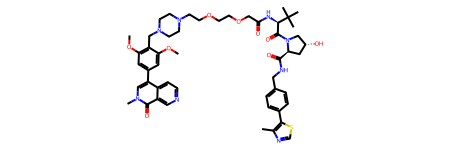

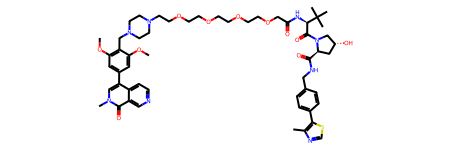

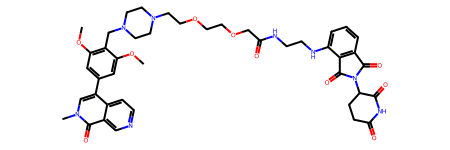

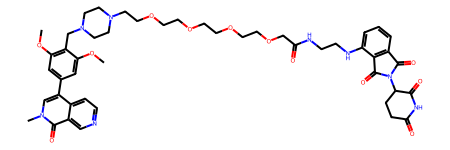

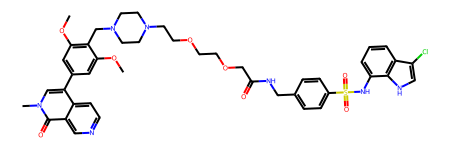

In [9]:
# Draw some PROTAC molecules using RDKit
from rdkit.Chem import Draw

# Draw the first 10 PROTACs from PROTAC-DB
protac_db_mols = [Chem.MolFromSmiles(smiles) for smiles in protac_db_df['Smiles'].unique()[:5]]
protac_db_mols = [mol for mol in protac_db_mols if mol is not None]
protac_db_mols = protac_db_mols[:5]
for mol in protac_db_mols:
    display(mol)
# img = Draw.MolsToGridImage(protac_db_mols, molsPerRow=5, subImgSize=(200, 200))
# img

## Bar Plots of Performance Metrics

In [10]:
from typing import Optional, List, Dict

In [11]:
reports['test'].columns

Index(['train_loss', 'train_loss_step', 'train_loss_epoch', 'train_acc',
       'train_acc_epoch', 'train_f1_score', 'train_f1_score_epoch',
       'train_precision', 'train_precision_epoch', 'train_recall',
       'train_recall_epoch', 'train_roc_auc', 'train_roc_auc_epoch',
       'test_loss', 'test_acc', 'test_f1_score', 'test_precision',
       'test_recall', 'test_roc_auc', 'model_type', 'test_model_id',
       'train_len', 'train_active_perc', 'train_inactive_perc',
       'train_avg_tanimoto_dist', 'test_len', 'test_active_perc',
       'test_inactive_perc', 'test_avg_tanimoto_dist',
       'num_leaking_uniprot_train_test', 'num_leaking_smiles_train_test',
       'perc_leaking_uniprot_train_test', 'perc_leaking_smiles_train_test',
       'split_type'],
      dtype='object')

Pytorch performances:
Metrics: ['Accuracy', 'ROC AUC']
Metric: Accuracy
Metric: ROC AUC
Plotting performance for main part of the paper...


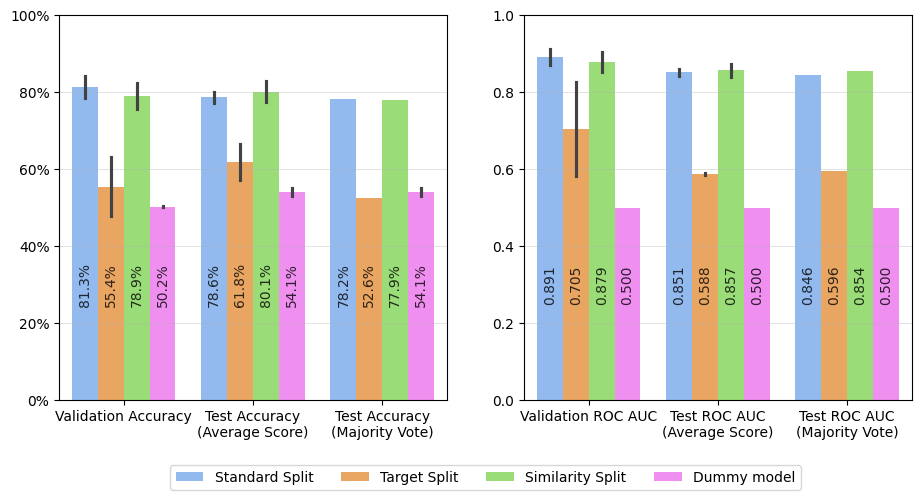

In [12]:
def plot_combined_data(combined_data: pd.DataFrame, title: str, show_plot: bool = False, metrics: List = ['Accuracy']) -> None:
    num_metrics = len(metrics)
    plt.figure(figsize=(6 * num_metrics, 4)) # 12,6
    sns.barplot(
        data=combined_data,
        x='Metric',
        y='Score',
        hue='Split Type',
        errorbar=('sd', 1),
        palette=palette)
    plt.title('')
    plt.ylabel('')
    plt.xlabel('')
    plt.ylim(0, 1.0)  # Assuming scores are normalized between 0 and 1
    plt.grid(axis='y', alpha=0.5, linewidth=0.5)

    # Make the y-axis as percentage
    if 'Accuracy' in metrics:
        plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter(1, decimals=0))
    # Plot the legend below the x-axis, outside the plot, and divided in two columns
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=4)

    # For each bar, add the rotated value (as percentage), inside the bar
    for i, p in enumerate(plt.gca().patches):
        # TODO: For some reasons, there are 4 additional rectangles being
        # plotted... I suspect it's because the dummy_df doesn't have the same
        # shape as the df containing all the evaluation data...
        if p.get_height() < 0.01:
            continue

        if num_metrics == 1:
            if 'Accuracy' in metrics:
                value = f'{p.get_height():.1%}'
            else:
                value = f'{p.get_height():.3f}'
        else:
            if i % 2 == 0:
                value = f'{p.get_height():.1%}'
            else:
                value = f'{p.get_height():.3f}'
        
        # print(f'Plotting value: {p.get_height():.5f} -> {value}')
        x = p.get_x() + p.get_width() / 2
        y = 0.3 # p.get_height() - p.get_height() / 2
        plt.annotate(value, (x, y), ha='center', va='center', color='black', fontsize=10, rotation=90, alpha=0.8)

    plt.savefig(f'plots/{title}.pdf', bbox_inches='tight')
    # plt.savefig(f'plots/{title}.png', bbox_inches='tight')
    if show_plot:
        plt.show()
    else:
        plt.close()
    
    # print(combined_data.to_markdown(index=False))


def plot_performance_metrics(
        df_cv: pd.DataFrame,
        df_test: pd.DataFrame,
        df_test_majority: Optional[pd.DataFrame] = None,
        title: Optional[str] = None,
        show_plot: bool = False,
        metrics_to_plot: Dict[str, str] = {
            'val_acc': 'Validation Accuracy',
            'val_roc_auc': 'Validation ROC AUC',
            'test_acc': 'Test Accuracy',
            'test_roc_auc': 'Test ROC AUC',
        },
) -> None:
    # Extract and prepare CV data
    val_metrics = [k for k in metrics_to_plot.keys() if 'val' in k]
    cv_data = df_cv[['model_type', 'fold', 'split_type'] + val_metrics]
    cv_data = cv_data.melt(id_vars=['model_type', 'fold', 'split_type'], var_name='Metric', value_name='Score')
    cv_data['Metric'] = cv_data['Metric'].replace(metrics_to_plot)
    cv_data['Stage'] = cv_data['Metric'].apply(lambda x: 'Validation' if 'Val' in x else 'Test')
    # Remove test data from CV data
    cv_data = cv_data[cv_data['Stage'] == 'Validation']

    # Extract and prepare test data
    test_metrics = [k for k in metrics_to_plot.keys() if 'test' in k]
    test_data = df_test[['model_type', 'split_type'] + test_metrics]
    test_data = test_data.melt(id_vars=['model_type', 'split_type'], var_name='Metric', value_name='Score')
    # Add a suffix to the metric name to differentiate from the majority score
    test_data['Metric'] = test_data['Metric'].replace({k: f'{v}\n(Average Score)' for k, v in metrics_to_plot.items()})
    test_data['Stage'] = '(Average Score)'

    # Combine CV and test data
    combined_data = pd.concat([cv_data, test_data], ignore_index=True)

    if df_test_majority is not None:
        # Extract and prepare test data
        test_data_majority = df_test_majority[['model_type', 'split_type'] + test_metrics]
        test_data_majority = test_data_majority.melt(id_vars=['model_type', 'split_type'], var_name='Metric', value_name='Score')
        # Add a suffix to the metric name to differentiate from the average score
        test_data_majority['Metric'] = test_data_majority['Metric'].replace({k: f'{v}\n(Majority Vote)' for k, v in metrics_to_plot.items()})
        test_data_majority['Stage'] = '(Majority Vote)'
        combined_data = pd.concat([combined_data, test_data_majority], ignore_index=True)

    # Rename 'split_type' values according to a predefined map for clarity
    group2name = {
        'random': 'Standard Split',
        'uniprot': 'Target Split',
        'tanimoto': 'Similarity Split',
        'standard': 'Standard Split',
        'target': 'Target Split',
        'similarity': 'Similarity Split',
    }
    combined_data['Split Type'] = combined_data['split_type'].map(group2name)

    # Add dummy model data
    dummy_val_acc = []
    dummy_test_acc = []
    for i, group in enumerate(group2name.keys()):
        # Get the majority class in group_df
        group_df = df_cv[df_cv['split_type'] == group]
        major_col = 'inactive' if group_df['val_inactive_perc'].mean() > 0.5 else 'active'
        dummy_val_acc.append(group_df[f'val_{major_col}_perc'].mean())

        group_df = df_test[df_test['split_type'] == group]
        major_col = 'inactive' if group_df['test_inactive_perc'].mean() > 0.5 else 'active'
        dummy_test_acc.append(group_df[f'test_{major_col}_perc'].mean())

    dummy_scores = []
    for i in range(len(dummy_val_acc)):
        metrics = {
            'Validation Accuracy': dummy_val_acc[i],
            'Test Accuracy\n(Average Score)': dummy_test_acc[i],
        }
        # All other metrics are set to 0.5 (i.e., random guessing)
        for k, v in metrics_to_plot.items():
            if 'acc' not in k:
                if 'val' not in k:
                    metrics[f'{v}\n(Average Score)'] = 0.5
                    metrics[f'{v}\n(Majority Vote)'] = 0.5
                else:
                    metrics[v] = 0.5

        if df_test_majority is not None:
            metrics['Test Accuracy\n(Majority Vote)'] = dummy_test_acc[i]

        for metric, score in metrics.items():
            dummy_scores.append({
                'Experiment': i,
                'Metric': metric,
                'Score': score,
                'Split Type': 'Dummy model',
            })
    dummy_model = pd.DataFrame(dummy_scores)
    combined_data = pd.concat([combined_data, dummy_model], ignore_index=True)

    # Plotting
    metrics = list({k.replace('Test ', '').replace('Validation ', '') for k in metrics_to_plot.values()})
    print(f'Metrics: {metrics}')
    num_metrics = len(metrics)

    plot_combined_data(combined_data, title, show_plot, metrics)

    for metric in metrics:
        print(f'Metric: {metric}')
        # Plot the data for the current metric
        metric_data = combined_data[combined_data['Metric'].str.contains(metric)]
        plot_combined_data(metric_data, f'{title}_{metric}', show_plot, [metric])

    # plt.figure(figsize=(6 * num_metrics, 6)) # 12,6
    # sns.barplot(
    #     data=combined_data,
    #     x='Metric',
    #     y='Score',
    #     hue='Split Type',
    #     errorbar=('sd', 1),
    #     palette=palette)
    # plt.title('')
    # plt.ylabel('')
    # plt.xlabel('')
    # plt.ylim(0, 1.0)  # Assuming scores are normalized between 0 and 1
    # plt.grid(axis='y', alpha=0.5, linewidth=0.5)

    # # Make the y-axis as percentage
    # plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter(1, decimals=0))
    # # Plot the legend below the x-axis, outside the plot, and divided in two columns
    # plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08), ncol=4)

    # # For each bar, add the rotated value (as percentage), inside the bar
    # for i, p in enumerate(plt.gca().patches):
    #     # TODO: For some reasons, there are 4 additional rectangles being
    #     # plotted... I suspect it's because the dummy_df doesn't have the same
    #     # shape as the df containing all the evaluation data...
    #     if p.get_height() < 0.01:
    #         continue
    #     if i % 2 == 0:
    #         value = f'{p.get_height():.1%}'
    #     else:
    #         value = f'{p.get_height():.3f}'
        
    #     # print(f'Plotting value: {p.get_height():.5f} -> {value}')
    #     x = p.get_x() + p.get_width() / 2
    #     y = 0.4 # p.get_height() - p.get_height() / 2
    #     plt.annotate(value, (x, y), ha='center', va='center', color='black', fontsize=10, rotation=90, alpha=0.8)

    # # plt.savefig(f'plots/{title}.pdf', bbox_inches='tight')
    # if show_plot:
    #     plt.show()

    print('Plotting performance for main part of the paper...')

    # Plot in the same above the accuracy and the ROC AUC in two different subplots
    fig, axes = plt.subplots(1, 2, figsize=(11, 5))
    sns.barplot(
        data=combined_data[combined_data['Metric'].str.contains('Accuracy')],
        x='Metric',
        y='Score',
        hue='Split Type',
        errorbar=('sd', 1),
        palette=palette,
        ax=axes[0])
    sns.barplot(
        data=combined_data[combined_data['Metric'].str.contains('ROC AUC')],
        x='Metric',
        y='Score',
        hue='Split Type',
        errorbar=('sd', 1),
        palette=palette,
        ax=axes[1])
    # axes[0].set_title('Accuracy')
    axes[0].set_ylabel('')
    axes[0].set_xlabel('')
    axes[0].set_ylim(0, 1.0)
    axes[0].grid(axis='y', alpha=0.5, linewidth=0.5)
    axes[0].yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter(1, decimals=0))
    axes[0].legend().remove()

    # axes[1].set_title('ROC AUC')
    axes[1].set_ylabel('')
    axes[1].set_xlabel('')
    axes[1].set_ylim(0, 1.0)
    axes[1].grid(axis='y', alpha=0.5, linewidth=0.5)
    # axes[1].yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter(1, decimals=0))
    axes[1].legend().remove()

    # For each bar in both subplots, add the rotated value (as percentage), inside the bar
    for i, ax in enumerate(axes):
        for p in ax.patches:
            if p.get_height() < 0.01:
                continue
            if i % 2 == 0:
                value = f'{p.get_height():.1%}'
            else:
                value = f'{p.get_height():.3f}'
            
            x = p.get_x() + p.get_width() / 2
            y = 0.3 # p.get_height() - p.get_height() / 2
            ax.annotate(value, (x, y), ha='center', va='center', color='black', fontsize=10, rotation=90, alpha=0.8)

    plt.legend(loc='upper center', bbox_to_anchor=(-0.1, -0.15), ncol=4)
    plt.savefig(f'plots/{title}.pdf', bbox_inches='tight')
    if show_plot:
        plt.show()

print('Pytorch performances:')
plot_performance_metrics(
    df_cv=reports['cv_train'],
    df_test=reports['test'],
    df_test_majority=reports['majority_vote'][reports['majority_vote']['cv_models'].isna()],
    title=f'summary_performance-best_models_as_test',
    show_plot=False,
)

### PyTorch Plots

Pytorch performances:
Metrics: ['Recall', 'ROC AUC', 'Precision', 'F1 Score', 'Accuracy']
Metric: Recall
Metric: ROC AUC
Metric: Precision
Metric: F1 Score
Metric: Accuracy
Plotting performance for main part of the paper...


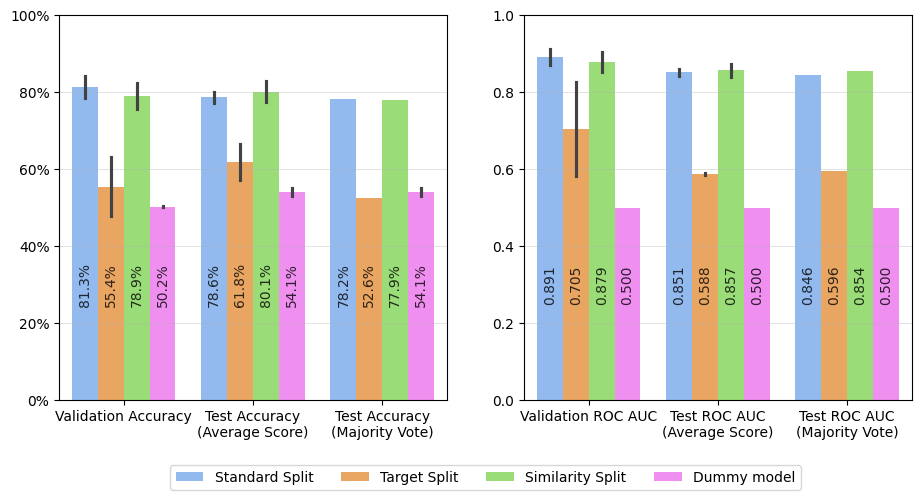

In [13]:
print('Pytorch performances:')
plot_performance_metrics(
    df_cv=reports['cv_train'],
    df_test=reports['test'],
    df_test_majority=reports['majority_vote'][reports['majority_vote']['cv_models'].isna()],
    title=f'pytorch_performance',
    show_plot=False,
    metrics_to_plot = {
        'val_acc': 'Validation Accuracy',
        'val_roc_auc': 'Validation ROC AUC',
        'val_f1_score': 'Validation F1 Score',
        'val_precision': 'Validation Precision',
        'val_recall': 'Validation Recall',
        'test_acc': 'Test Accuracy',
        'test_roc_auc': 'Test ROC AUC',
        'test_f1_score': 'Test F1 Score',
        'test_precision': 'Test Precision',
        'test_recall': 'Test Recall',
    },
)

### XGBoost Plots

XGBoost performances:
Metrics: ['Recall', 'ROC AUC', 'Precision', 'F1 Score', 'Accuracy']
Metric: Recall
Metric: ROC AUC
Metric: Precision
Metric: F1 Score
Metric: Accuracy
Plotting performance for main part of the paper...


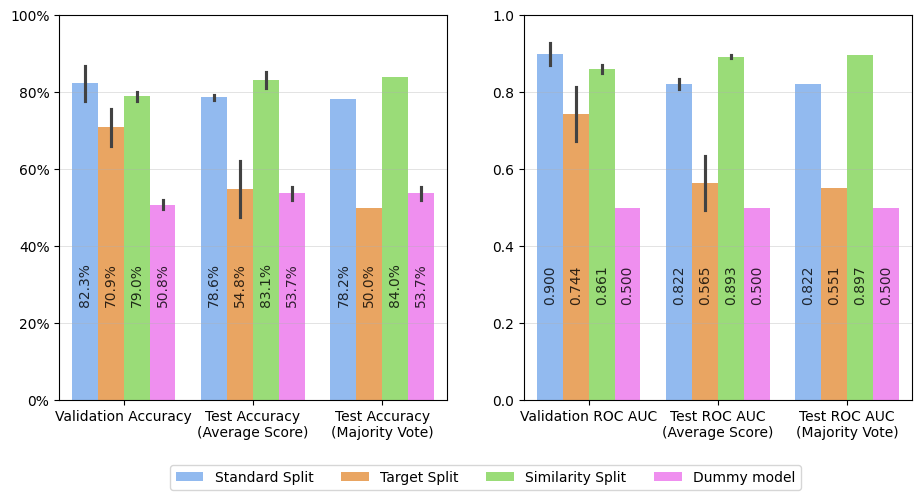

In [14]:
print('XGBoost performances:')
plot_performance_metrics(
    df_cv=reports['xgboost_cv_train'],
    df_test=reports['xgboost_test'],
    df_test_majority=reports['xgboost_majority_vote'],
    title=f'xgboost_performance',
    show_plot=False,
    metrics_to_plot = {
        'val_acc': 'Validation Accuracy',
        'val_roc_auc': 'Validation ROC AUC',
        'val_f1_score': 'Validation F1 Score',
        'val_precision': 'Validation Precision',
        'val_recall': 'Validation Recall',
        'test_acc': 'Test Accuracy',
        'test_roc_auc': 'Test ROC AUC',
        'test_f1_score': 'Test F1 Score',
        'test_precision': 'Test Precision',
        'test_recall': 'Test Recall',
    },
)

### Cells as One-Hot Encoded

Cells as one-hot performances:
Metrics: ['Recall', 'ROC AUC', 'Precision', 'F1 Score', 'Accuracy']
Metric: Recall
Metric: ROC AUC
Metric: Precision
Metric: F1 Score
Metric: Accuracy
Plotting performance for main part of the paper...


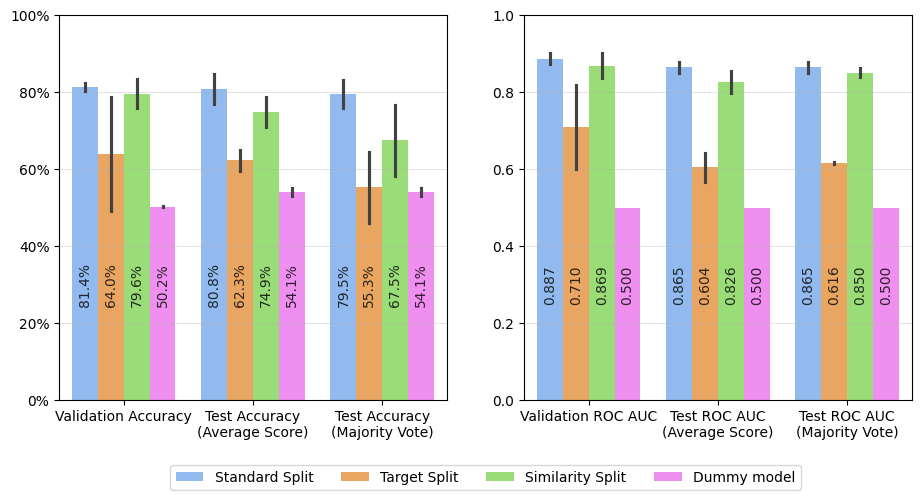

In [15]:
print('Cells as one-hot performances:')
plot_performance_metrics(
    df_cv=reports['cellsonehot_cv_train'],
    df_test=reports['cellsonehot_test'],
    df_test_majority=reports['cellsonehot_majority_vote'],
    title=f'cellsonehot_performance',
    show_plot=False,
    metrics_to_plot = {
        'val_acc': 'Validation Accuracy',
        'val_roc_auc': 'Validation ROC AUC',
        'val_f1_score': 'Validation F1 Score',
        'val_precision': 'Validation Precision',
        'val_recall': 'Validation Recall',
        'test_acc': 'Test Accuracy',
        'test_roc_auc': 'Test ROC AUC',
        'test_f1_score': 'Test F1 Score',
        'test_precision': 'Test Precision',
        'test_recall': 'Test Recall',
    },
)

### Proteins as Amino-Acid Counts

Proteins as amino-acid counts performances:
Metrics: ['Recall', 'ROC AUC', 'Precision', 'F1 Score', 'Accuracy']
Metric: Recall
Metric: ROC AUC
Metric: Precision
Metric: F1 Score
Metric: Accuracy
Plotting performance for main part of the paper...


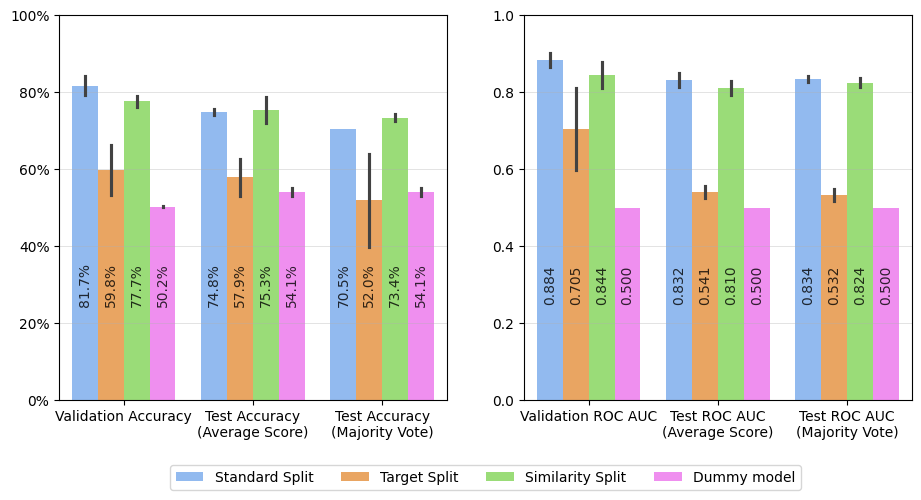

In [16]:
print('Proteins as amino-acid counts performances:')
plot_performance_metrics(
    df_cv=reports['aminoacidcnt_cv_train'],
    df_test=reports['aminoacidcnt_test'],
    df_test_majority=reports['aminoacidcnt_majority_vote'],
    title=f'aminoacidcnt_performance',
    show_plot=False,
    metrics_to_plot = {
        'val_acc': 'Validation Accuracy',
        'val_roc_auc': 'Validation ROC AUC',
        'val_f1_score': 'Validation F1 Score',
        'val_precision': 'Validation Precision',
        'val_recall': 'Validation Recall',
        'test_acc': 'Test Accuracy',
        'test_roc_auc': 'Test ROC AUC',
        'test_f1_score': 'Test F1 Score',
        'test_precision': 'Test Precision',
        'test_recall': 'Test Recall',
    },
)

### Compare Performance

/tmp/ipykernel_1899217/2462072186.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['Experiment'] = r
/tmp/ipykernel_1899217/2462072186.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['Experiment'] = r
/tmp/ipykernel_1899217/2462072186.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

| Experiment                    | Study      |   Test Accuracy |   Test ROC AUC |
|:------------------------------|:-----------|----------------:|---------------:|
| Baseline                      | Standard   |        0.782051 |       0.845847 |
| Baseline                      | Target     |        0.526316 |       0.595819 |
| Baseline                      | Similarity |        0.779221 |       0.854336 |
| Cells as one-hot              | Standard   |        0.820513 |       0.875083 |
| Cells as one-hot              | Target     |        0.618421 |       0.61324  |
| Cells as one-hot              | Similarity |        0.74026  |       0.842141 |
| Proteins as amino-acid counts | Standard   |        0.705128 |       0.828571 |
| Proteins as amino-acid counts | Target     |        0.605263 |       0.543554 |
| Proteins as amino-acid counts | Similarity |        0.74026  |       0.815718 |
--------------------------------------------------------------------------------
Comparison of the

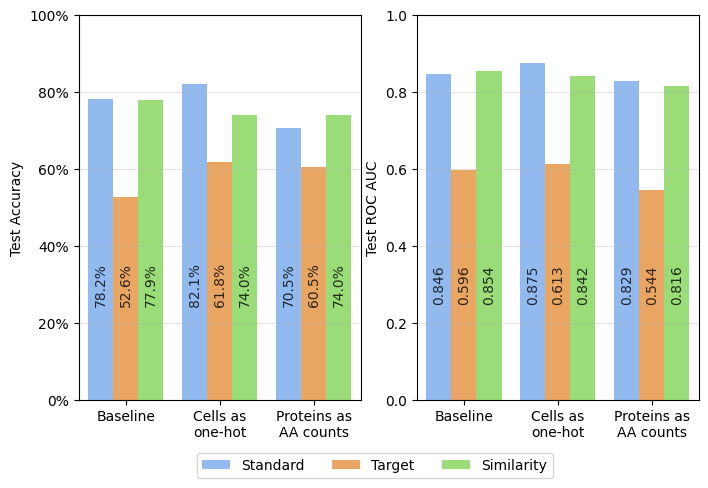

In [17]:
df = []
for r in ['majority_vote', 'cellsonehot_majority_vote', 'aminoacidcnt_majority_vote']:
    tmp = reports[r]
    tmp = tmp[tmp['cv_models'].isna()]
    tmp['Experiment'] = r
    df.append(tmp)
df = pd.concat(df)
# Rename split_type to paper names
df['split_type'] = df['split_type'].replace({
    'random': 'Standard',
    'uniprot': 'Target',
    'tanimoto': 'Similarity',
    'standard': 'Standard',
    'target': 'Target',
    'similarity': 'Similarity',
})
# Rename columns to paper names
df.rename(columns={
    'split_type': 'Study',
    'test_acc': 'Test Accuracy',
    'test_roc_auc': 'Test ROC AUC',
}, inplace=True)
# Rename experiment names to paper names
df['Experiment'] = df['Experiment'].replace({
    'majority_vote': 'Baseline',
    'cellsonehot_majority_vote': 'Cells as one-hot',
    'aminoacidcnt_majority_vote': 'Proteins as amino-acid counts',
})
print(df[['Experiment', 'Study', 'Test Accuracy', 'Test ROC AUC']].to_markdown(index=False))
df['Experiment'] = df['Experiment'] = df['Experiment'].replace({
    'Cells as one-hot': 'Cells as\none-hot',
    'Proteins as amino-acid counts': 'Proteins as\nAA counts',
})

def plot_comparison_df(df, filename=None):
    # Plot the test accuracy and ROC AUC in two bar-plots side by side, with Study as hue
    _, axes = plt.subplots(1, 2, figsize=(8, 5))
    sns.barplot(
        data=df,
        x='Experiment',
        y='Test Accuracy',
        hue='Study',
        errorbar=('sd', 1),
        palette=palette[:3],
        ax=axes[0])
    # Set ax[0] y-axis to percentage
    axes[0].yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter(1, decimals=0))
    # Set ax[0] y-axis limit from 0 to 100
    axes[0].set_ylim(0, 1.0)
    # Remove the x-axis label
    axes[0].set_xlabel('')
    axes[0].grid(axis='y', alpha=0.5, linewidth=0.5)

    sns.barplot(
        data=df,
        x='Experiment',
        y='Test ROC AUC',
        hue='Study',
        errorbar=('sd', 1),
        palette=palette[:3],
        ax=axes[1])
    axes[1].set_ylim(0, 1.0)
    # Remove the legend from the first plot
    axes[0].legend().remove()
    # Set the legend outside the plot in the middle of the two subplots (3 columns)
    axes[1].legend(loc='upper center', bbox_to_anchor=(-0.15, -0.12), ncol=3)
    # Remove the x-axis label
    axes[1].set_xlabel('')
    axes[1].grid(axis='y', alpha=0.5, linewidth=0.5)

    # Add values to the bar plots rotated 90 degrees at 0.5 height
    for i, ax in enumerate(axes):
        for p in ax.patches:
            if p.get_height() < 0.01:
                continue
            if i % 2 == 0:
                value = f'{p.get_height():.1%}'
            else:
                value = f'{p.get_height():.3f}'
            
            x = p.get_x() + p.get_width() / 2
            y = 0.3
            ax.annotate(value, (x, y), ha='center', va='center', color='black', fontsize=10, rotation=90, alpha=0.8)

    if filename is not None:
        plt.savefig(f'plots/{filename}.pdf', bbox_inches='tight')
        # plt.savefig(f'plots/{filename}.png', bbox_inches='tight')
    plt.show()

print('-' * 80)
print('Comparison of the best models majority vote:')
plot_comparison_df(df, 'embedding_comparison_majority_vote')

| Experiment                    | Study      |   Test Accuracy |   Test ROC AUC |
|:------------------------------|:-----------|----------------:|---------------:|
| Baseline                      | Similarity |        0.800866 |       0.857498 |
| Baseline                      | Standard   |        0.786325 |       0.851163 |
| Baseline                      | Target     |        0.618421 |       0.588386 |
| Cells as one-hot              | Similarity |        0.748918 |       0.826107 |
| Cells as one-hot              | Standard   |        0.807692 |       0.864895 |
| Cells as one-hot              | Target     |        0.622807 |       0.604413 |
| Proteins as amino-acid counts | Similarity |        0.753247 |       0.810298 |
| Proteins as amino-acid counts | Standard   |        0.747863 |       0.831672 |
| Proteins as amino-acid counts | Target     |        0.578947 |       0.540999 |
--------------------------------------------------------------------------------
Comparison of the

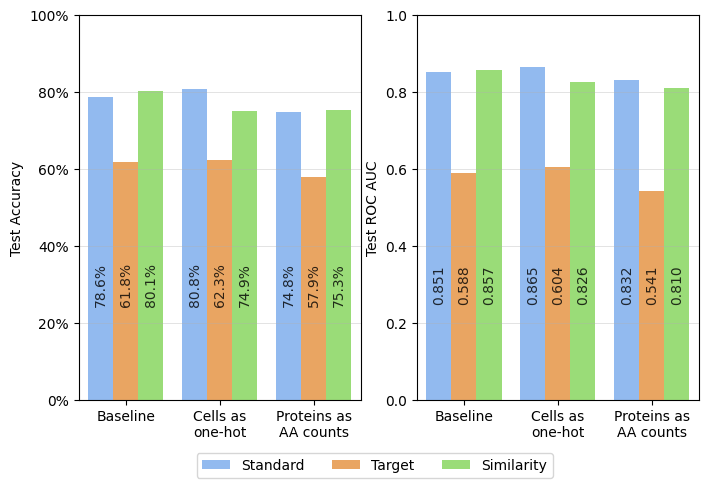

In [18]:
df = []
for r in ['test', 'cellsonehot_test', 'aminoacidcnt_test']:
    tmp = reports[r]
    tmp['Experiment'] = r
    df.append(tmp)
df = pd.concat(df)
# Rename split_type to paper names
df['split_type'] = df['split_type'].replace({
    'random': 'Standard',
    'uniprot': 'Target',
    'tanimoto': 'Similarity',
    'standard': 'Standard',
    'target': 'Target',
    'similarity': 'Similarity',
})
# Rename columns to paper names
df.rename(columns={
    'split_type': 'Study',
    'test_acc': 'Test Accuracy',
    'test_roc_auc': 'Test ROC AUC',
}, inplace=True)
# Group by experiment and split type then get the mean
df = df.groupby(['Experiment', 'Study']).mean(['Test Accuracy', 'Test ROC AUC']).reset_index()
# Rename experiment names to paper names
df['Experiment'] = df['Experiment'].replace({
    'test': 'Baseline',
    'cellsonehot_test': 'Cells as one-hot',
    'aminoacidcnt_test': 'Proteins as amino-acid counts',
})
# Order df by Experiment
df = df.sort_values(['Experiment'])
# Order Study by ['Standard', 'Target', 'Similarity']
df['Study'] = pd.Categorical(df['Study'], ['Standard', 'Target', 'Similarity'])

print(df[['Experiment', 'Study', 'Test Accuracy', 'Test ROC AUC']].to_markdown(index=False))
df['Experiment'] = df['Experiment'] = df['Experiment'].replace({
    'Cells as one-hot': 'Cells as\none-hot',
    'Proteins as amino-acid counts': 'Proteins as\nAA counts',
})

print('-' * 80)
print('Comparison of the best models mean values:')
plot_comparison_df(df, 'embedding_comparison_mean')

## Ablation Studies

In [26]:
def plot_ablation_study(report, title=''):
    # Define the ablation study combinations
    ablation_study_combinations = [
        'disabled smiles',
        'disabled poi',
        'disabled e3',
        'disabled cell',
        'disabled poi e3',
        'disabled poi e3 smiles',
        'disabled poi e3 cell',
    ]

    for group in report['split_type'].unique():
        print('-' * 80)
        print(f'Plotting ablation study for {group} CV split')
        print('-' * 80)
        baseline = report[report['disabled_embeddings'].isna()].copy()
        baseline = baseline[baseline['split_type'] == group]
        baseline['disabled_embeddings'] = 'all embeddings enabled'
        # metrics_to_show = ['val_acc', 'test_acc']
        metrics_to_show = ['test_acc']
        # baseline = baseline.melt(id_vars=['fold', 'disabled_embeddings'], value_vars=metrics_to_show, var_name='metric', value_name='score')
        baseline = baseline.melt(id_vars=['disabled_embeddings'], value_vars=metrics_to_show, var_name='metric', value_name='score')

        ablation_dfs = []
        for disabled_embeddings in ablation_study_combinations:
            tmp = report[report['disabled_embeddings'] == disabled_embeddings].copy()
            tmp = tmp[tmp['split_type'] == group]
            # tmp = tmp.melt(id_vars=['fold', 'disabled_embeddings'], value_vars=metrics_to_show, var_name='metric', value_name='score')
            tmp = tmp.melt(id_vars=['disabled_embeddings'], value_vars=metrics_to_show, var_name='metric', value_name='score')
            ablation_dfs.append(tmp)
        ablation_df = pd.concat(ablation_dfs)

        dummy_test_df = pd.DataFrame()
        tmp = report[report['split_type'] == group]
        dummy_test_df['score'] = tmp[['test_active_perc', 'test_inactive_perc']].max(axis=1)
        dummy_test_df['metric'] = 'test_acc'
        dummy_test_df['disabled_embeddings'] = 'dummy'

        # dummy_df = pd.concat([dummy_val_df, dummy_test_df])
        dummy_df = dummy_test_df

        final_df = pd.concat([dummy_df, baseline, ablation_df])

        final_df['metric'] = final_df['metric'].map({
            'val_acc': 'Validation Accuracy',
            'test_acc': 'Test Accuracy',
            'val_roc_auc': 'Val ROC-AUC',
            'test_roc_auc': 'Test ROC-AUC',
        })

        final_df['disabled_embeddings'] = final_df['disabled_embeddings'].map({
            'all embeddings enabled': 'All embeddings enabled',
            'dummy': 'Dummy model',
            'disabled smiles': 'Disabled PROTAC information',
            'disabled e3': 'Disabled E3 information',
            'disabled poi': 'Disabled POI information',
            'disabled cell': 'Disabled cell information',
            'disabled poi e3': 'Disabled E3 and POI info',
            'disabled poi e3 smiles': 'Disabled compound, E3, and POI info\n(only cell information left)',
            'disabled poi e3 cell': 'Disabled cell, E3, and POI info\n(only PROTAC information left)',
        })

        # Print final_df to latex
        tmp  = final_df.groupby(['disabled_embeddings', 'metric']).mean().round(3)
        # Remove fold column to tmp
        tmp = tmp.reset_index() #.drop('fold', axis=1)

        # print('DF to plot:\n', tmp.to_markdown(index=False))

        fig, ax = plt.subplots(figsize=(3, 5))
        
        # fig, ax = plt.subplots()

        sns.barplot(data=final_df,
            y='disabled_embeddings',
            x='score',
            hue='metric',
            ax=ax,
            errorbar=('sd', 1),
            palette=sns.color_palette(palette, len(palette)),
            saturation=1,
        )

        # ax.set_title(f'{group.replace("random", "standard")} CV split')
        ax.grid(axis='x', alpha=0.5)
        ax.tick_params(axis='y', rotation=0)
        ax.set_xlim(0, 1.0)
        ax.xaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter(1, decimals=0))
        ax.set_ylabel('')
        ax.set_xlabel('')

        # Plot the legend below the x-axis, outside the plot
        ax.legend(loc='upper center', bbox_to_anchor=(0.02, -0.1))

        # For each bar, add the rotated value (as percentage), inside the bar
        for i, p in enumerate(plt.gca().patches):
            # TODO: For some reasons, there is an additional bar being added at
            # the end of the plot... it's not in the dataframe
            if i == len(plt.gca().patches) - 1:
                continue
            value = '{:.1f}%'.format(100 * p.get_width())
            y = p.get_y() + p.get_height() / 2
            x = 0.2 # p.get_height() - p.get_height() / 2
            plt.annotate(value, (x, y), ha='center', va='center', color='black', fontsize=10, alpha=0.8)

        plt.savefig(f'plots/{title}{group}.pdf', bbox_inches='tight')
        plt.close()

for experiment in ['', 'cellsonehot_', 'aminoacidcnt_']:
    reports[f'{experiment}test']['disabled_embeddings'] = pd.NA
    experiment_name = 'pytorch_' if experiment == '' else experiment
    plot_ablation_study(
        pd.concat([
            reports[f'{experiment}ablation'],
            reports[f'{experiment}test'],
        ]),
        title=f'{experiment_name}ablation_study_'
    )

--------------------------------------------------------------------------------
Plotting ablation study for standard CV split
--------------------------------------------------------------------------------


/tmp/ipykernel_1899217/2296657062.py:75: UserWarning: The palette list has more values (4) than needed (1), which may not be intended.
  sns.barplot(data=final_df,


--------------------------------------------------------------------------------
Plotting ablation study for target CV split
--------------------------------------------------------------------------------


/tmp/ipykernel_1899217/2296657062.py:75: UserWarning: The palette list has more values (4) than needed (1), which may not be intended.
  sns.barplot(data=final_df,


--------------------------------------------------------------------------------
Plotting ablation study for similarity CV split
--------------------------------------------------------------------------------


/tmp/ipykernel_1899217/2296657062.py:75: UserWarning: The palette list has more values (4) than needed (1), which may not be intended.
  sns.barplot(data=final_df,


--------------------------------------------------------------------------------
Plotting ablation study for standard CV split
--------------------------------------------------------------------------------


/tmp/ipykernel_1899217/2296657062.py:75: UserWarning: The palette list has more values (4) than needed (1), which may not be intended.
  sns.barplot(data=final_df,


--------------------------------------------------------------------------------
Plotting ablation study for target CV split
--------------------------------------------------------------------------------


/tmp/ipykernel_1899217/2296657062.py:75: UserWarning: The palette list has more values (4) than needed (1), which may not be intended.
  sns.barplot(data=final_df,


--------------------------------------------------------------------------------
Plotting ablation study for similarity CV split
--------------------------------------------------------------------------------


/tmp/ipykernel_1899217/2296657062.py:75: UserWarning: The palette list has more values (4) than needed (1), which may not be intended.
  sns.barplot(data=final_df,


--------------------------------------------------------------------------------
Plotting ablation study for standard CV split
--------------------------------------------------------------------------------


/tmp/ipykernel_1899217/2296657062.py:75: UserWarning: The palette list has more values (4) than needed (1), which may not be intended.
  sns.barplot(data=final_df,


--------------------------------------------------------------------------------
Plotting ablation study for target CV split
--------------------------------------------------------------------------------


/tmp/ipykernel_1899217/2296657062.py:75: UserWarning: The palette list has more values (4) than needed (1), which may not be intended.
  sns.barplot(data=final_df,


--------------------------------------------------------------------------------
Plotting ablation study for similarity CV split
--------------------------------------------------------------------------------


/tmp/ipykernel_1899217/2296657062.py:75: UserWarning: The palette list has more values (4) than needed (1), which may not be intended.
  sns.barplot(data=final_df,


## Others

In [166]:
!pwd

/cephyr/users/ribes/Alvis/PROTAC-Degradation-Predictor


In [95]:
import sys
import protac_degradation_predictor as pdp

protac_df = pdp.load_curated_dataset()
protac_df

,Compound ID,Uniprot,Smiles,E3 Ligase,InChI,InChI Key,Molecular Weight,Heavy Atom Count,Ring Count,Rotatable Bond Count,...,Name,Assay (DC50/Dmax),Exact Mass,XLogP3,Target (Parsed),POI Sequence,E3 Ligase Uniprot,E3 Ligase Sequence,Cell Line Identifier,Active - OR
0,1,Q07817,Cc1ncsc1-c1ccc([C@H](C)NC(=O)[C@@H]2C[C@@H](O)...,VHL,InChI=1S/C73H88ClF3N10O10S4/c1-47(49-13-15-51(...,SXPDUCVNMGMWBJ-FMZBIETASA-N,1486.282,101,10,24,...,NaN,NaN,NaN,NaN,NaN,MSQSNRELVVDFLSYKLSQKGYSWSQFSDVEENRTEAPEGTESEME...,P40337,MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...,MOLT-4,NaN
1,2,Q07817,Cc1ncsc1-c1ccc([C@H](C)NC(=O)[C@@H]2C[C@@H](O)...,VHL,InChI=1S/C74H90ClF3N10O10S4/c1-48(50-13-15-52(...,HQKUMELJMUNTTF-NMKDNUEVSA-N,1500.309,102,10,25,...,NaN,NaN,NaN,NaN,NaN,MSQSNRELVVDFLSYKLSQKGYSWSQFSDVEENRTEAPEGTESEME...,P40337,MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...,MOLT-4,NaN
2,3,Q07817,Cc1ncsc1-c1ccc([C@H](C)NC(=O)[C@@H]2C[C@@H](O)...,VHL,InChI=1S/C75H92ClF3N10O10S4/c1-49(51-16-18-53(...,ATQCEJKUPSBDMA-QARNUTPLSA-N,1514.336,103,10,26,...,NaN,NaN,NaN,NaN,NaN,MSQSNRELVVDFLSYKLSQKGYSWSQFSDVEENRTEAPEGTESEME...,P40337,MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...,MOLT-4,NaN
3,4,Q07817,Cc1ncsc1-c1ccc([C@H](C)NC(=O)[C@@H]2C[C@@H](O)...,VHL,InChI=1S/C76H94ClF3N10O10S4/c1-50(52-17-19-54(...,FNKQAGMHNFFSEI-DTTPTBRMSA-N,1528.363,104,10,27,...,NaN,NaN,NaN,NaN,NaN,MSQSNRELVVDFLSYKLSQKGYSWSQFSDVEENRTEAPEGTESEME...,P40337,MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...,MOLT-4,NaN
4,5,Q07817,Cc1ncsc1-c1ccc([C@H](C)NC(=O)[C@@H]2C[C@@H](O)...,VHL,InChI=1S/C77H96ClF3N10O10S4/c1-51(53-18-20-55(...,PXVFFBGSTYQHRO-REQIQPEASA-N,1542.390,105,10,28,...,NaN,NaN,NaN,NaN,NaN,MSQSNRELVVDFLSYKLSQKGYSWSQFSDVEENRTEAPEGTESEME...,P40337,MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...,MOLT-4,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2136,2342,O60885,Cc1ncsc1-c1ccc(CNC(=O)[C@@H]2C[C@@H](O)CN2C(=O...,VHL,InChI=1S/C50H61ClN8O8S2/c1-29-31(3)69-49-42(29...,VRVWHAZIBGEPEK-DPSJZEHMSA-N,1001.673,69,7,20,...,NaN,Degradation of BRD4 long in HEK293 cells after...,1000.374231,6.76,BRD4 long,MSAESGPGTRLRNLPVMGDGLETSQMSTTQAQAQPQPANAASTNPP...,P40337,MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...,HEK293,True
2137,2887,Q05397,CNC(=O)c1ccccc1Nc1cc(Nc2ccc(N3CCN(CCOCCOCCOCCO...,VHL,InChI=1S/C58H75F3N10O10S/c1-37(39-12-14-40(15-...,FOOHAGZPIHCYKX-ZSFXBAAMSA-N,1161.359,82,7,27,...,NaN,Degradation of FAK in A549 cells after 24 h tr...,1160.534044,6.81,FAK,MAAAYLDPNLNHTPNSSTKTHLGTGMERSPGAMERVLKVFHYFESN...,P40337,MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...,A549 Cas9,False
2138,2889,Q05397,CNC(=O)c1ccccc1Nc1cc(Nc2ccc(N3CCN(CCOCCOCC(=O)...,VHL,InChI=1S/C54H67F3N10O8S/c1-33(35-12-14-36(15-1...,RDCVMTUYWQXPEC-FSHOLZCKSA-N,1073.253,76,7,21,...,NaN,Degradation of FAK in A549 cells after 24 h tr...,1072.481615,7.11,FAK,MAAAYLDPNLNHTPNSSTKTHLGTGMERSPGAMERVLKVFHYFESN...,P40337,MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...,A549 Cas9,False
2139,2890,Q05397,CNC(=O)c1ccccc1Nc1cc(Nc2ccc(N3CCN(CCOCC(=O)N[C...,VHL,InChI=1S/C52H63F3N10O7S/c1-31(33-12-14-34(15-1...,SLSLLSIRBMAERC-MGVZSLQJSA-N,1029.200,73,7,18,...,NaN,Degradation of FAK in A549 cells after 24 h tr...,1028.455400,7.26,FAK,MAAAYLDPNLNHTPNSSTKTHLGTGMERSPGAMERVLKVFHYFESN...,P40337,MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...,A549 Cas9,True


In [56]:
from rdkit import Chem

def canon_smiles(smi):
    mol = Chem.MolFromSmiles(smi)
    if mol is None:
        return None
    return Chem.MolToSmiles(mol)

# Canonicalize SMILES
protac_df['canon_smiles'] = protac_df['Smiles'].apply(lambda x: canon_smiles(x))
# Check that all canon_smiles is equal to the Smiles column
protac_df['canon_smiles'].equals(protac_df['Smiles'])

True

In [97]:
import numpy as np

# Remove duplicates with a custom function
def merge_numerical_cols(group):
    key_cols = [
        'Smiles',
        'Uniprot',
        'E3 Ligase Uniprot',
        'Cell Line Identifier',
    ]
    class_cols = ['DC50 (nM)', 'Dmax (%)']
    # Loop over all numerical columns
    for col in group.select_dtypes(include=[np.number]).columns:
        if col == 'Compound ID':
            continue
        # Compute the geometric mean for the column
        values = group[col].dropna()
        if not values.empty:
            group[col] = np.prod(values) ** (1 / len(values))

    row = group.drop_duplicates(subset=key_cols + class_cols).reset_index(drop=True)

    assert len(row) == 1

    return row


def remove_duplicates(df):
    key_cols = [
        'Smiles',
        'Uniprot',
        'E3 Ligase Uniprot',
        'Cell Line Identifier',
    ]
    class_cols = ['DC50 (nM)', 'Dmax (%)']
    # Check if there are any duplicated entries having the same key columns, if
    # so, merge them by applying a geometric mean to their DC50 and Dmax columns
    duplicated = df[df.duplicated(subset=key_cols, keep=False)]

    # NOTE: Reset index to remove the multi-index
    merged = duplicated.groupby(key_cols).apply(lambda x: merge_numerical_cols(x))
    merged = merged.reset_index(drop=True)

    # Remove the duplicated entries from the original dataframe df
    df = df[~df.duplicated(subset=key_cols, keep=False)]
    # Concatenate the merged dataframe with the original dataframe
    return pd.concat([df, merged], ignore_index=True)


display(protac_df)
display(remove_duplicates(protac_df))

,Compound ID,Uniprot,Smiles,E3 Ligase,InChI,InChI Key,Molecular Weight,Heavy Atom Count,Ring Count,Rotatable Bond Count,...,Name,Assay (DC50/Dmax),Exact Mass,XLogP3,Target (Parsed),POI Sequence,E3 Ligase Uniprot,E3 Ligase Sequence,Cell Line Identifier,Active - OR
0,1,Q07817,Cc1ncsc1-c1ccc([C@H](C)NC(=O)[C@@H]2C[C@@H](O)...,VHL,InChI=1S/C73H88ClF3N10O10S4/c1-47(49-13-15-51(...,SXPDUCVNMGMWBJ-FMZBIETASA-N,1486.282,101,10,24,...,NaN,NaN,NaN,NaN,NaN,MSQSNRELVVDFLSYKLSQKGYSWSQFSDVEENRTEAPEGTESEME...,P40337,MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...,MOLT-4,NaN
1,2,Q07817,Cc1ncsc1-c1ccc([C@H](C)NC(=O)[C@@H]2C[C@@H](O)...,VHL,InChI=1S/C74H90ClF3N10O10S4/c1-48(50-13-15-52(...,HQKUMELJMUNTTF-NMKDNUEVSA-N,1500.309,102,10,25,...,NaN,NaN,NaN,NaN,NaN,MSQSNRELVVDFLSYKLSQKGYSWSQFSDVEENRTEAPEGTESEME...,P40337,MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...,MOLT-4,NaN
2,3,Q07817,Cc1ncsc1-c1ccc([C@H](C)NC(=O)[C@@H]2C[C@@H](O)...,VHL,InChI=1S/C75H92ClF3N10O10S4/c1-49(51-16-18-53(...,ATQCEJKUPSBDMA-QARNUTPLSA-N,1514.336,103,10,26,...,NaN,NaN,NaN,NaN,NaN,MSQSNRELVVDFLSYKLSQKGYSWSQFSDVEENRTEAPEGTESEME...,P40337,MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...,MOLT-4,NaN
3,4,Q07817,Cc1ncsc1-c1ccc([C@H](C)NC(=O)[C@@H]2C[C@@H](O)...,VHL,InChI=1S/C76H94ClF3N10O10S4/c1-50(52-17-19-54(...,FNKQAGMHNFFSEI-DTTPTBRMSA-N,1528.363,104,10,27,...,NaN,NaN,NaN,NaN,NaN,MSQSNRELVVDFLSYKLSQKGYSWSQFSDVEENRTEAPEGTESEME...,P40337,MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...,MOLT-4,NaN
4,5,Q07817,Cc1ncsc1-c1ccc([C@H](C)NC(=O)[C@@H]2C[C@@H](O)...,VHL,InChI=1S/C77H96ClF3N10O10S4/c1-51(53-18-20-55(...,PXVFFBGSTYQHRO-REQIQPEASA-N,1542.390,105,10,28,...,NaN,NaN,NaN,NaN,NaN,MSQSNRELVVDFLSYKLSQKGYSWSQFSDVEENRTEAPEGTESEME...,P40337,MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...,MOLT-4,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2136,2342,O60885,Cc1ncsc1-c1ccc(CNC(=O)[C@@H]2C[C@@H](O)CN2C(=O...,VHL,InChI=1S/C50H61ClN8O8S2/c1-29-31(3)69-49-42(29...,VRVWHAZIBGEPEK-DPSJZEHMSA-N,1001.673,69,7,20,...,NaN,Degradation of BRD4 long in HEK293 cells after...,1000.374231,6.76,BRD4 long,MSAESGPGTRLRNLPVMGDGLETSQMSTTQAQAQPQPANAASTNPP...,P40337,MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...,HEK293,True
2137,2887,Q05397,CNC(=O)c1ccccc1Nc1cc(Nc2ccc(N3CCN(CCOCCOCCOCCO...,VHL,InChI=1S/C58H75F3N10O10S/c1-37(39-12-14-40(15-...,FOOHAGZPIHCYKX-ZSFXBAAMSA-N,1161.359,82,7,27,...,NaN,Degradation of FAK in A549 cells after 24 h tr...,1160.534044,6.81,FAK,MAAAYLDPNLNHTPNSSTKTHLGTGMERSPGAMERVLKVFHYFESN...,P40337,MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...,A549 Cas9,False
2138,2889,Q05397,CNC(=O)c1ccccc1Nc1cc(Nc2ccc(N3CCN(CCOCCOCC(=O)...,VHL,InChI=1S/C54H67F3N10O8S/c1-33(35-12-14-36(15-1...,RDCVMTUYWQXPEC-FSHOLZCKSA-N,1073.253,76,7,21,...,NaN,Degradation of FAK in A549 cells after 24 h tr...,1072.481615,7.11,FAK,MAAAYLDPNLNHTPNSSTKTHLGTGMERSPGAMERVLKVFHYFESN...,P40337,MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...,A549 Cas9,False
2139,2890,Q05397,CNC(=O)c1ccccc1Nc1cc(Nc2ccc(N3CCN(CCOCC(=O)N[C...,VHL,InChI=1S/C52H63F3N10O7S/c1-31(33-12-14-34(15-1...,SLSLLSIRBMAERC-MGVZSLQJSA-N,1029.200,73,7,18,...,NaN,Degradation of FAK in A549 cells after 24 h tr...,1028.455400,7.26,FAK,MAAAYLDPNLNHTPNSSTKTHLGTGMERSPGAMERVLKVFHYFESN...,P40337,MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...,A549 Cas9,True


,Compound ID,Uniprot,Smiles,E3 Ligase,InChI,InChI Key,Molecular Weight,Heavy Atom Count,Ring Count,Rotatable Bond Count,...,Name,Assay (DC50/Dmax),Exact Mass,XLogP3,Target (Parsed),POI Sequence,E3 Ligase Uniprot,E3 Ligase Sequence,Cell Line Identifier,Active - OR
0,1,Q07817,Cc1ncsc1-c1ccc([C@H](C)NC(=O)[C@@H]2C[C@@H](O)...,VHL,InChI=1S/C73H88ClF3N10O10S4/c1-47(49-13-15-51(...,SXPDUCVNMGMWBJ-FMZBIETASA-N,1486.282,101.0,10.0,24.0,...,NaN,NaN,NaN,NaN,NaN,MSQSNRELVVDFLSYKLSQKGYSWSQFSDVEENRTEAPEGTESEME...,P40337,MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...,MOLT-4,NaN
1,2,Q07817,Cc1ncsc1-c1ccc([C@H](C)NC(=O)[C@@H]2C[C@@H](O)...,VHL,InChI=1S/C74H90ClF3N10O10S4/c1-48(50-13-15-52(...,HQKUMELJMUNTTF-NMKDNUEVSA-N,1500.309,102.0,10.0,25.0,...,NaN,NaN,NaN,NaN,NaN,MSQSNRELVVDFLSYKLSQKGYSWSQFSDVEENRTEAPEGTESEME...,P40337,MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...,MOLT-4,NaN
2,3,Q07817,Cc1ncsc1-c1ccc([C@H](C)NC(=O)[C@@H]2C[C@@H](O)...,VHL,InChI=1S/C75H92ClF3N10O10S4/c1-49(51-16-18-53(...,ATQCEJKUPSBDMA-QARNUTPLSA-N,1514.336,103.0,10.0,26.0,...,NaN,NaN,NaN,NaN,NaN,MSQSNRELVVDFLSYKLSQKGYSWSQFSDVEENRTEAPEGTESEME...,P40337,MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...,MOLT-4,NaN
3,4,Q07817,Cc1ncsc1-c1ccc([C@H](C)NC(=O)[C@@H]2C[C@@H](O)...,VHL,InChI=1S/C76H94ClF3N10O10S4/c1-50(52-17-19-54(...,FNKQAGMHNFFSEI-DTTPTBRMSA-N,1528.363,104.0,10.0,27.0,...,NaN,NaN,NaN,NaN,NaN,MSQSNRELVVDFLSYKLSQKGYSWSQFSDVEENRTEAPEGTESEME...,P40337,MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...,MOLT-4,NaN
4,6,Q07817,Cc1ncsc1-c1ccc([C@H](C)NC(=O)[C@@H]2C[C@@H](O)...,VHL,InChI=1S/C78H98ClF3N10O10S4/c1-52(54-19-21-56(...,DKBAKHBUQPFQDO-PXKQGBTKSA-N,1556.417,106.0,10.0,29.0,...,NaN,NaN,NaN,NaN,NaN,MSQSNRELVVDFLSYKLSQKGYSWSQFSDVEENRTEAPEGTESEME...,P40337,MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...,MOLT-4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1896,384,Q07820,O=C(CCCCC(=O)NCCN1C(=O)c2cccc3c(Sc4ccc(Br)cc4)...,CRBN,InChI=1S/C45H45BrN6O8S/c46-27-15-17-28(18-16-2...,BORXNUWYWZOREQ-UHFFFAOYSA-N,909.860,61.0,7.0,19.0,...,NaN,NaN,908.220296,5.98,NaN,MFGLKRNAVIGLNLYCGGAGLGAGSGGATRPGGRLLATEKEASARR...,Q96SW2,MAGEGDQQDAAHNMGNHLPLLPAESEEEDEMEVEDQDSKEAKKPNI...,HeLa,NaN
1897,910,Q9UBN7,O=C(CCCCCCC(=O)N/N=C/c1ccc(OCCOCCOCCn2cc(CNc3c...,CRBN,InChI=1S/C37H45N9O10/c47-31-15-14-30(35(50)40-...,MHILTYZXXFOWJH-WVKHYPTHSA-N,775.820,56.0,5.0,23.0,...,NaN,NaN,775.328939,1.00,NaN,MTSTGQDSTTTRQRRSRQNPQSPPQDSSVTSKRNIKKGAVPRSIPN...,Q96SW2,MAGEGDQQDAAHNMGNHLPLLPAESEEEDEMEVEDQDSKEAKKPNI...,MM1.S,NaN
1898,2544,O60760,O=C1CCC(N2C(=O)c3cccc(N4CCN(C(=O)C5CCN(c6ccc(N...,CRBN,InChI=1S/C40H38N8O7/c49-33-14-13-32(36(51)44-3...,KQNXUQJGOJWQGL-UHFFFAOYSA-N,742.793,55.0,8.0,8.0,...,PROTAC(H-PGDS)-7,Degradation of HPGDS in KU812 cells after 6/24...,742.286346,2.77,HPGDS,MPNYKLTYFNMRGRAEIIRYIFAYLDIQYEDHRIEQADWPEIKSTL...,Q96SW2,MAGEGDQQDAAHNMGNHLPLLPAESEEEDEMEVEDQDSKEAKKPNI...,Ku812,True
1899,1214,P14174,O=C1CCC(N2C(=O)c3cccc(NCCCCCCCC(=O)Nc4ccc(N5Cc...,CRBN,InChI=1S/C35H35N5O8/c41-24-15-10-21-20-39(35(4...,HAHDZDUOFHMMEA-UHFFFAOYSA-N,653.692,48.0,6.0,12.0,...,NaN,NaN,653.248563,4.16,NaN,MPMFIVNTNVPRASVPDGFLSELTQQLAQATGKPPQYIAVHVVPDQ...,Q96SW2,MAGEGDQQDAAHNMGNHLPLLPAESEEEDEMEVEDQDSKEAKKPNI...,A549 Cas9,False


In [93]:
pDC50_threshold = 6.0
Dmax_threshold = 0.6
protac_df['Active'] = protac_df.apply(
    lambda x: pdp.is_active(x['DC50 (nM)'], x['Dmax (%)'], pDC50_threshold=pDC50_threshold, Dmax_threshold=Dmax_threshold), axis=1
)
protac_df['E3 Ligase'] = protac_df['E3 Ligase'].str.replace('Iap', 'IAP')

In [90]:
# Get all entries with same ['Smiles', 'Uniprot', 'Cell Line Identifier', 'E3 Ligase Uniprot'] columns
tmp = protac_df.dropna(subset=['Smiles', 'Uniprot', 'Cell Line Identifier', 'E3 Ligase Uniprot', 'Active'])[['Smiles', 'Uniprot', 'Cell Line Identifier', 'E3 Ligase Uniprot', 'Active', 'Database']]

# Get entries with duplicates
duplicates = tmp[tmp.duplicated(subset=['Smiles', 'Uniprot', 'Cell Line Identifier', 'E3 Ligase Uniprot', 'Active'], keep=False)]
# Sort duplicates, so that they appear close to each other
duplicates = duplicates.sort_values(['Smiles', 'Uniprot', 'Cell Line Identifier', 'E3 Ligase Uniprot', 'Active'])
duplicates.to_csv('duplicates.csv', index=False)
duplicates

,Smiles,Uniprot,Cell Line Identifier,E3 Ligase Uniprot,Active,Database


In [24]:
# Get all entries with same ['Smiles', 'Uniprot', 'Cell Line Identifier', 'E3 Ligase'] columns
tmp = protac_df.dropna(subset=['Smiles', 'Uniprot', 'Cell Line Identifier', 'E3 Ligase', 'Active'])
tmp = tmp.groupby(['Smiles', 'Uniprot', 'Cell Line Identifier', 'E3 Ligase', 'Active']).size()
tmp = tmp[tmp > 1]
tmp = protac_df[
    protac_df.apply(lambda x: (x['Smiles'], x['Uniprot'], x['Cell Line Identifier'], x['E3 Ligase'], x['Active']) in
        tmp.index, axis=1)
]
display(tmp[['Smiles', 'Uniprot', 'Cell Line Identifier', 'E3 Ligase', 'Active']])

# Display the tmp entries ['Smiles', 'Uniprot', 'Cell Line Identifier', 'E3 Ligase'] with an additional column with their repetition count
tmp = tmp[['Smiles', 'Uniprot', 'Cell Line Identifier', 'E3 Ligase', 'Active']]
tmp['Count'] = tmp.groupby(['Smiles', 'Uniprot', 'Cell Line Identifier', 'E3 Ligase', 'Active'])['Smiles'].transform('count')
tmp = tmp.drop_duplicates()
tmp['Count'].describe()

,Smiles,Uniprot,Cell Line Identifier,E3 Ligase,Active
4,Cc1ncsc1-c1ccc([C@H](C)NC(=O)[C@@H]2C[C@@H](O)...,Q07817,MOLT-4,VHL,True
129,O=C1CCC(N2Cc3c(NC(=O)CCCCCCCN4CCN(c5ccc(Nc6cc7...,P00533,HCC827,CRBN,True
137,Cc1ncsc1-c1ccc(CNC(=O)[C@@H]2C[C@@H](O)CN2C(=O...,P00533,HCC827,VHL,True
175,Cc1ncsc1-c1ccc(CNC(=O)[C@@H]2C[C@@H](O)CN2C(=O...,O43353,THP-1,VHL,True
178,Nc1ncnc2c1c(-c1ccc(Oc3ccccc3)cc1)nn2C1CCN(CCCC...,Q06187,Namalwa,CRBN,True
...,...,...,...,...,...
1578,C=C(F)C(=O)N1CCN(c2nc(OC[C@@H]3CCCN3CCC(=O)NCC...,P01116,NCI-H2030,VHL,False
1641,CCn1c(=O)n(CC(=O)NCCOCCNC(=O)COc2cccc3c2C(=O)N...,O00418,MDA-MB-231,CRBN,False
2034,O=C1CCC(N2C(=O)c3cccc(NCCCCCCCC(=O)Nc4ccc(N5Cc...,P14174,A549 Cas9,CRBN,True
2120,Cc1sc2c(c1C)C(c1ccc(Cl)cc1)=N[C@@H](CC(=O)NCCO...,O60885,HEK293T,FEM1B,True


count    55.000000
mean      2.036364
std       0.188919
min       2.000000
25%       2.000000
50%       2.000000
75%       2.000000
max       3.000000
Name: Count, dtype: float64

In [25]:
def print_duplicates(df, active_col = 'Active (Dmax 0.6, pDC50 6.0)'):
    tmp = df.dropna(subset=['Smiles', 'Uniprot', 'Cell Line Identifier', 'E3 Ligase', active_col])
    tmp = tmp.groupby(['Smiles', 'Uniprot', 'Cell Line Identifier', 'E3 Ligase', active_col]).size()
    tmp = tmp[tmp > 1]
    tmp = df[
        df.apply(lambda x: (x['Smiles'], x['Uniprot'], x['Cell Line Identifier'], x['E3 Ligase'], x[active_col]) in
            tmp.index, axis=1)
    ]
    # display(tmp[['Smiles', 'Uniprot', 'Cell Line Identifier', 'E3 Ligase', active_col]])

    # Get entries with duplicates
    duplicates = tmp[tmp.duplicated(subset=['Smiles', 'Uniprot', 'Cell Line Identifier', 'E3 Ligase Uniprot', active_col], keep=False)]
    # Sort duplicates, so that they appear close to each other
    duplicates = duplicates.sort_values(['Smiles', 'Uniprot', 'Cell Line Identifier', 'E3 Ligase Uniprot', active_col])
    print(f'Duplicated entries (len {len(duplicates)} ({len(duplicates) / len(df):.4%})):')
    display(duplicates[['Smiles', 'Uniprot', 'Cell Line Identifier', 'E3 Ligase', active_col]])

    # Display the tmp entries ['Smiles', 'Uniprot', 'Cell Line Identifier', 'E3 Ligase'] with an additional column with their repetition count
    tmp = tmp[['Smiles', 'Uniprot', 'Cell Line Identifier', 'E3 Ligase', active_col]]
    tmp['Count'] = tmp.groupby(['Smiles', 'Uniprot', 'Cell Line Identifier', 'E3 Ligase', active_col])['Smiles'].transform('count')
    tmp = tmp.drop_duplicates()
    print(tmp['Count'].describe())

In [26]:
active_col = 'Active (Dmax 0.6, pDC50 6.0)'
studies_dir = 'data/studies'
train_val_perc = f'{int((1 - test_split) * 100)}'
test_perc = f'{int(test_split * 100)}'
active_name = active_col.replace(' ', '_').replace('(', '').replace(')', '').replace(',', '')

experiments = ['standard', 'similarity', 'target']

for split_type in experiments:

    train_val_filename = f'{split_type}_train_val_{train_val_perc}split_{active_name}.csv'
    test_filename = f'{split_type}_test_{test_perc}split_{active_name}.csv'
    
    train_val_df = pd.read_csv(os.path.join(studies_dir, train_val_filename))
    test_df = pd.read_csv(os.path.join(studies_dir, test_filename))

    print('-' * 80)
    print('-' * 80)
    print(f'Study: {split_type}')
    print('-' * 80)
    print('Test:')
    print_duplicates(test_df)
    print('-' * 80)
    print('Train/Val:')
    print_duplicates(train_val_df)

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Study: standard
--------------------------------------------------------------------------------
Test:
Duplicated entries (len 0 (0.0000%)):


,Smiles,Uniprot,Cell Line Identifier,E3 Ligase,"Active (Dmax 0.6, pDC50 6.0)"


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Count, dtype: float64
--------------------------------------------------------------------------------
Train/Val:
Duplicated entries (len 0 (0.0000%)):


,Smiles,Uniprot,Cell Line Identifier,E3 Ligase,"Active (Dmax 0.6, pDC50 6.0)"


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Count, dtype: float64
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Study: similarity
--------------------------------------------------------------------------------
Test:
Duplicated entries (len 0 (0.0000%)):


,Smiles,Uniprot,Cell Line Identifier,E3 Ligase,"Active (Dmax 0.6, pDC50 6.0)"


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Count, dtype: float64
--------------------------------------------------------------------------------
Train/Val:
Duplicated entries (len 0 (0.0000%)):


,Smiles,Uniprot,Cell Line Identifier,E3 Ligase,"Active (Dmax 0.6, pDC50 6.0)"


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Count, dtype: float64
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Study: target
--------------------------------------------------------------------------------
Test:
Duplicated entries (len 0 (0.0000%)):


,Smiles,Uniprot,Cell Line Identifier,E3 Ligase,"Active (Dmax 0.6, pDC50 6.0)"


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Count, dtype: float64
--------------------------------------------------------------------------------
Train/Val:
Duplicated entries (len 0 (0.0000%)):


,Smiles,Uniprot,Cell Line Identifier,E3 Ligase,"Active (Dmax 0.6, pDC50 6.0)"


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Count, dtype: float64


In [168]:
from sklearn.preprocessing import OneHotEncoder

cell2embedding = pdp.load_cell2embedding('../data/cell2embedding.pkl')

# Get one-hot encoded embeddings for cell lines
onehotenc = OneHotEncoder(sparse_output=False)
cell_embeddings = onehotenc.fit_transform(
    np.array(list(cell2embedding.keys())).reshape(-1, 1)
)
cell_embeddings.shape
# cell2embedding = {k: v for k, v in zip(cell2embedding.keys(), cell_embeddings)}

(1138, 1138)